# CS4035 - Cyber Data Analytics
## Lab 3 

## Group Number: 69

## Student 1 
### Name : Konrad Ponichtera
### ID : 5580749

## Student 2
### Name : Ion Babalau
### ID : 5626110

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nbformat

from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer


In [2]:
nb = nbformat.read("Lab3.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 318


## README

Expected location of dataset: _data_ directory, in same directory as notebook. 
All the necessary packages are specifeid in _requirements.txt_, and can be installed with the command: `pip install -r requirements.txt`

## 1. Familiarization and discretization task – 1 A4 (5 Points)

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.

In [3]:
df = pd.read_csv("data/dataset_10/capture20110818.binetflow")

infected_hosts = [
'147.32.84.165',
'147.32.84.191',
'147.32.84.192',
'147.32.84.193',
'147.32.84.204',
'147.32.84.205',
'147.32.84.206',
'147.32.84.207',
'147.32.84.208',
'147.32.84.209'
]

print('Dataset size:', len(df))

df.head()

Dataset size: 1309791


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


### Analyzing labels

In [4]:
def filter_benign(df):
    return df[~df['SrcAddr'].isin(infected_hosts)]

def filter_infected(df):
    return df[df['SrcAddr'].isin(infected_hosts)]

In [5]:
df_benign = filter_benign(df)
df_infected = filter_infected(df)

print('Data entries count:', len(df))
print('Data entries count from benign hosts:', len(df_benign))
print('Data entries count from infected hosts:', len(df_infected))

Data entries count: 1309791
Data entries count from benign hosts: 1203426
Data entries count from infected hosts: 106365


In [6]:
df_benign.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


In [7]:
df_infected.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
90622,2011/08/18 10:37:58.448307,0.000342,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V51-1-UDP-DNS
90808,2011/08/18 10:38:00.695278,0.010278,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V51-1-UDP-DNS
90809,2011/08/18 10:38:00.706560,0.043726,tcp,147.32.84.165,1027,->,74.125.232.206,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V51-1-TCP-HTTP-Google-Net-Est...
90965,2011/08/18 10:38:03.255934,0.010256,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,479,76,flow=From-Botnet-V51-1-UDP-DNS
90968,2011/08/18 10:38:03.267222,581.516663,udp,147.32.84.165,123,->,65.55.56.40,123,INT,0.0,NaN,4,360,360,flow=From-Botnet-V51-1-UDP-Attempt


In [56]:
print('Benign labels:', df_benign['Label'].unique())
print('Infected labels:', df_infected['Label'].unique())

Benign labels: ['flow=Background-TCP-Attempt' 'flow=Background-TCP-Established'
 'flow=Background-Established-cmpgw-CVUT' 'flow=To-Background-CVUT-Proxy'
 'flow=Background' 'flow=Background-UDP-Established'
 'flow=Background-UDP-Attempt' 'flow=From-Background-CVUT-Proxy'
 'flow=To-Background-UDP-CVUT-DNS-Server' 'flow=To-Background-Grill'
 'flow=Background-Attempt-cmpgw-CVUT'
 'flow=Background-UDP-NTP-Established-1' 'flow=Background-google-webmail'
 'flow=Background-google-analytics11' 'flow=From-Normal-V51-Grill'
 'flow=Background-google-analytics10' 'flow=From-Normal-V51-Stribrek'
 'flow=Background-google-analytics6' 'flow=To-Background-Stribrek'
 'flow=Background-google-analytics9' 'flow=To-Background-CVUT-WebServer'
 'flow=Background-google-analytics15' 'flow=Background-google-analytics2'
 'flow=From-Normal-V51-Jist' 'flow=Background-google-analytics8'
 'flow=To-Background-Jist' 'flow=Background-google-analytics3'
 'flow=Background-google-analytics14' 'flow=To-Background-MatLab-Ser

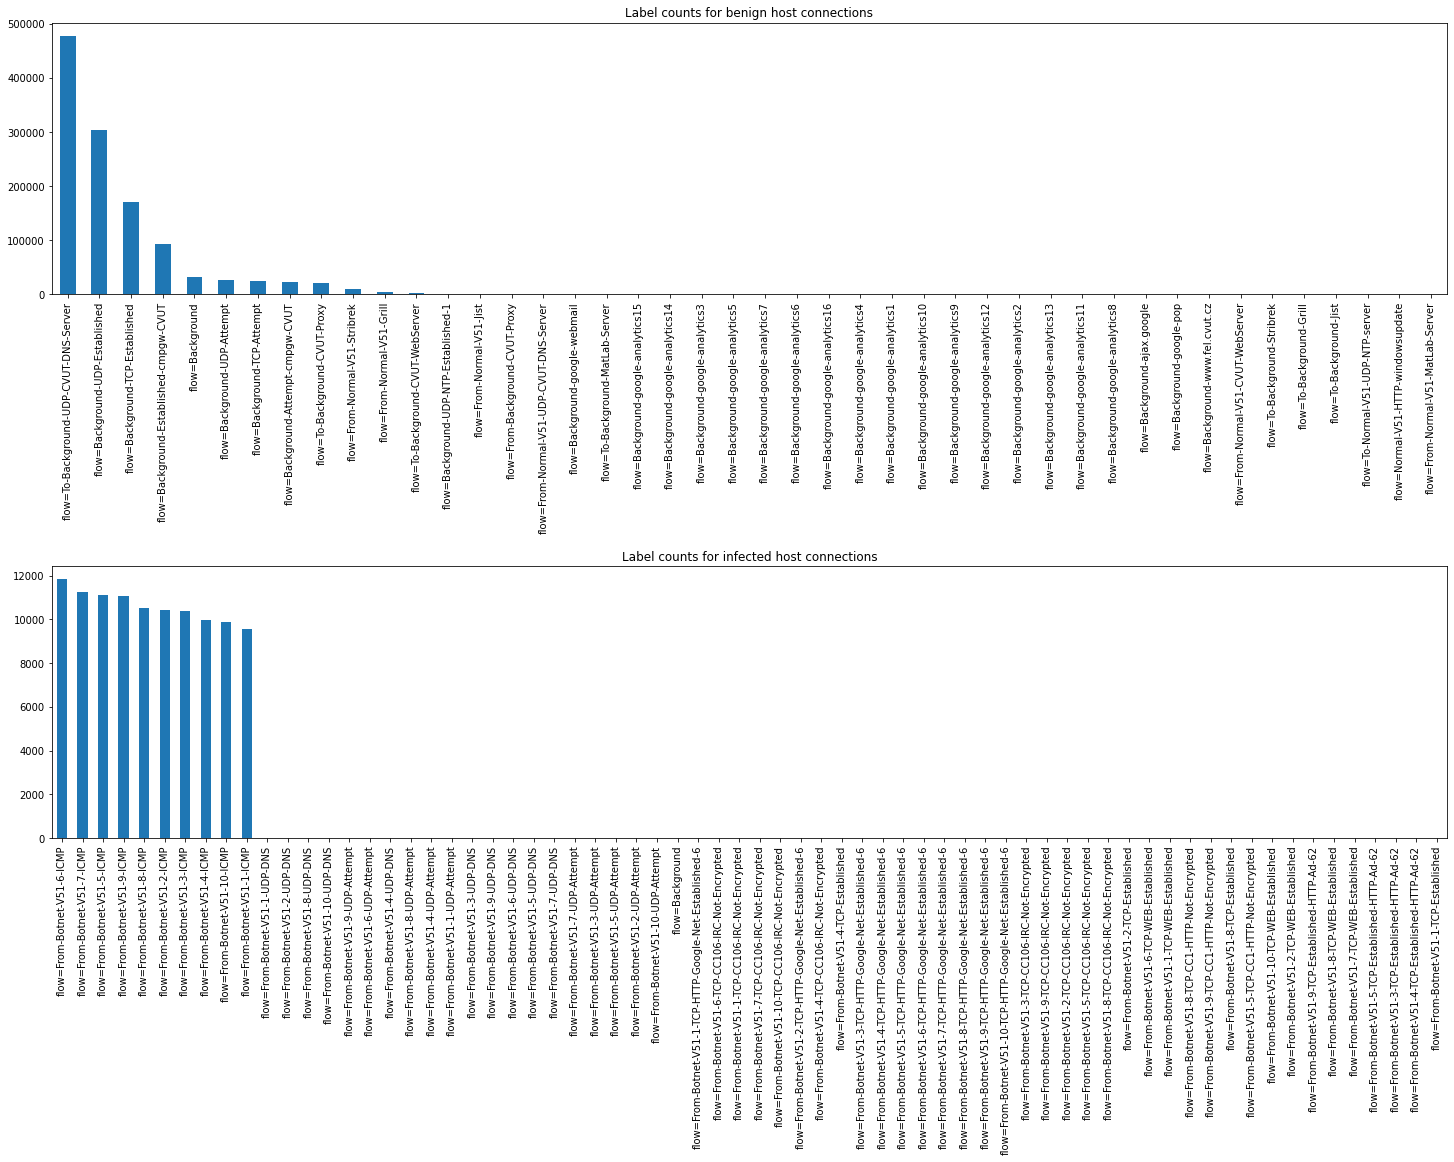

In [85]:
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 15))
plt.subplots_adjust(hspace=1)

df_benign['Label'].value_counts().plot(kind='bar', ax=ax1, title=f'Label counts for benign host connections')
df_infected['Label'].value_counts().plot(kind='bar', ax=ax2, title=f'Label counts for infected host connections')

plt.show()

### Visualizing features

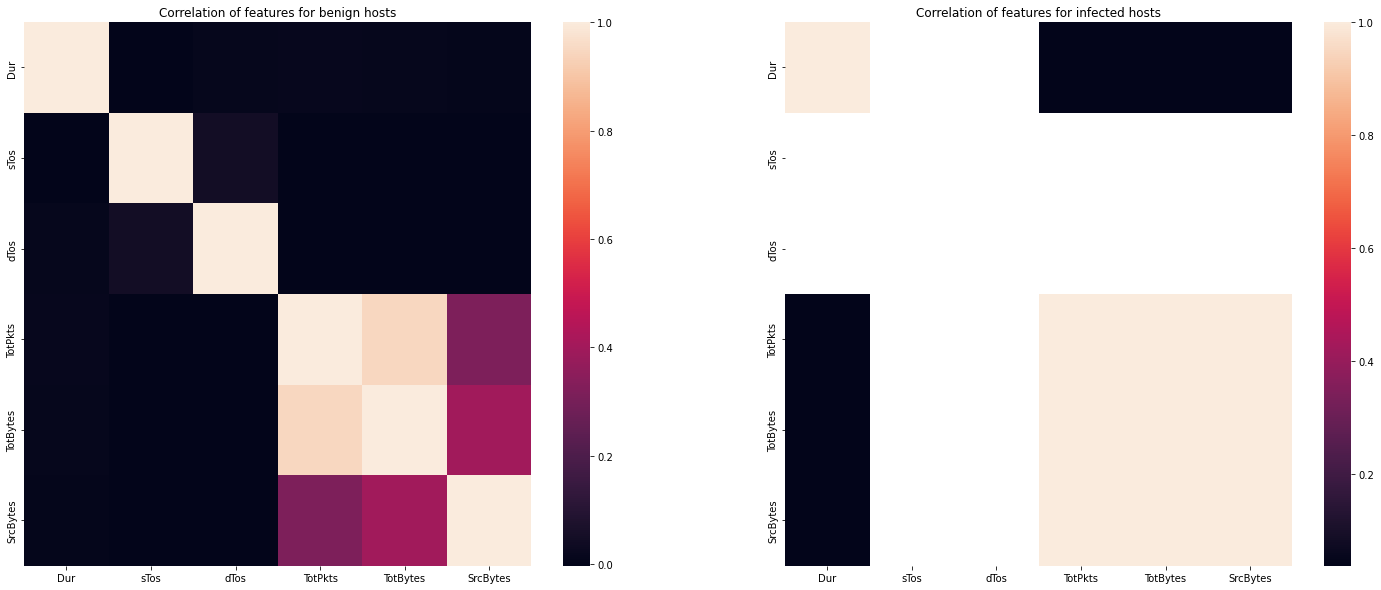

In [86]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

ax1.set_title('Correlation of features for benign hosts')
sns.heatmap(df_benign.corr(), ax=ax1)

ax2.set_title('Correlation of features for infected hosts')
sns.heatmap(df_infected.corr(), ax=ax2)

plt.show()

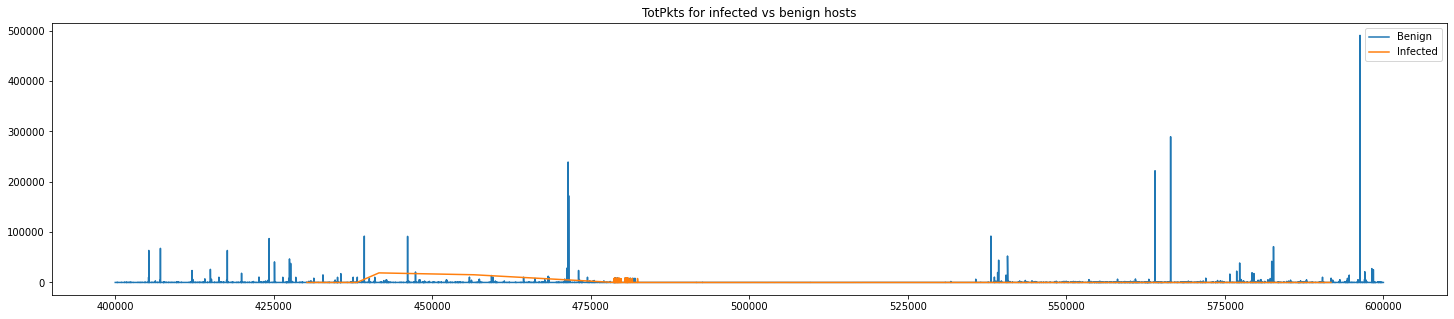

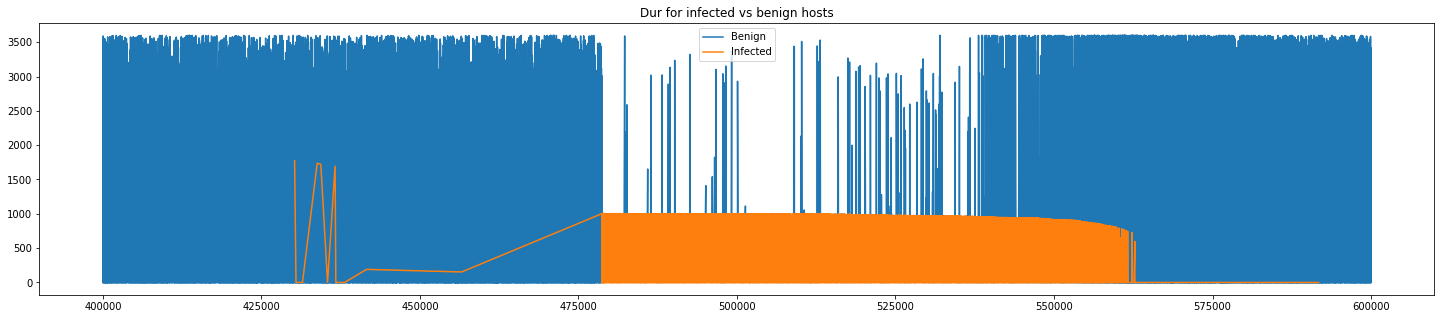

In [88]:
features = ['TotPkts', 'Dur']

df_fragment = df[400000:600000]

df_fragment_infected = filter_infected(df_fragment)
df_fragment_benign = filter_benign(df_fragment)

_, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.plot(df_fragment_benign[features[0]])
ax.plot(df_fragment_infected[features[0]])
ax.set_title(features[0] + ' for infected vs benign hosts')
ax.legend(labels=['Benign', 'Infected'])
plt.show()

_, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.plot(df_fragment_benign[features[1]])
ax.plot(df_fragment_infected[features[1]])
ax.set_title(features[1] + ' for infected vs benign hosts')
ax.legend(labels=['Benign', 'Infected'])
plt.show()


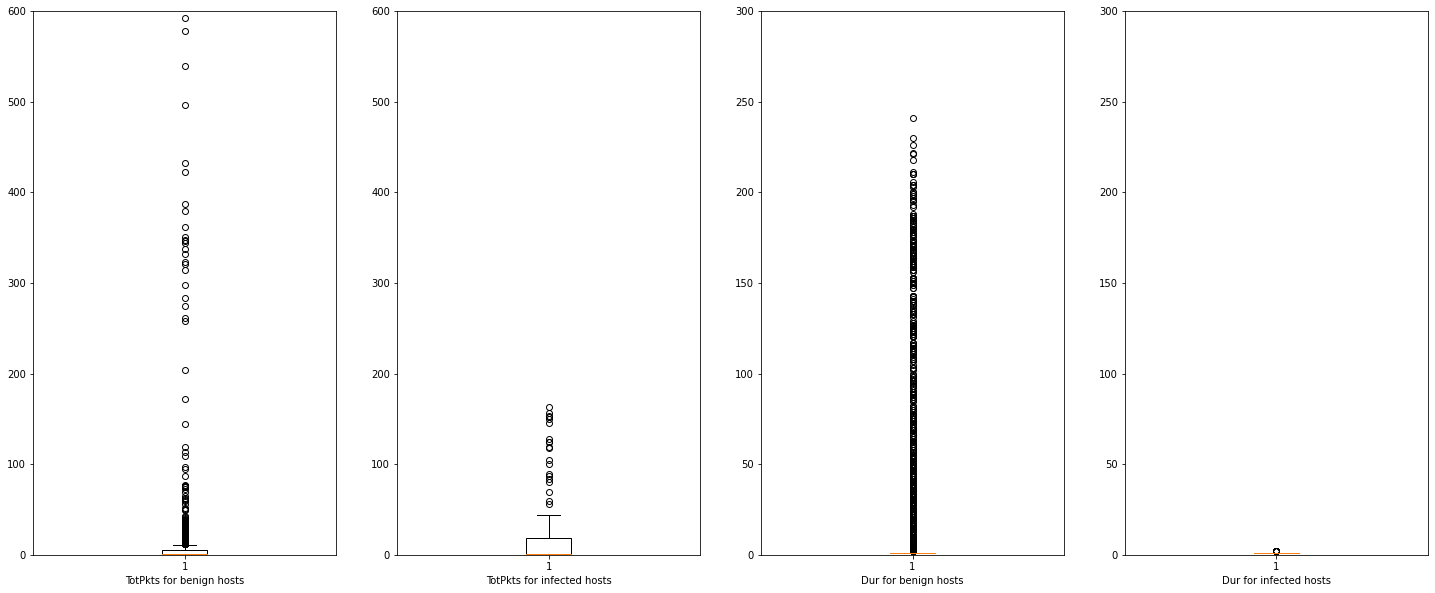

In [89]:
_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 10))

ax1.boxplot(df_fragment_benign[features[0]].value_counts())
ax1.set_xlabel(f'{features[0]} for benign hosts')
ax1.set_ylim(0, 600)

ax2.boxplot(df_fragment_infected[features[0]].value_counts())
ax2.set_xlabel(f'{features[0]} for infected hosts')
ax2.set_ylim(0, 600)

ax3.boxplot(df_fragment_benign[features[1]].value_counts())
ax3.set_xlabel(f'{features[1]} for benign hosts')
ax3.set_ylim(0, 300)

ax4.boxplot(df_fragment_infected[features[1]].value_counts())
ax4.set_xlabel(f'{features[1]} for infected hosts')
ax4.set_ylim(0, 300)

plt.show()

### 1b. Discretize selected features

In [90]:
def discretize(discretizer, feature_array):
    """
    Discretizes the passed data.

    Arguments:
        discretizer: Discretizer, fitted with the learning data
        feature_array: Numpy array with data to discretize, using the passed discretizer
    Returns:
        Discretized data, passed as feature_array argument
    """
    bins = discretizer.transform(feature_array)[:, 0]
    vectorizer = np.vectorize(lambda x: int(discretizer.bin_edges_[0][int(x)]))

    return vectorizer(bins)

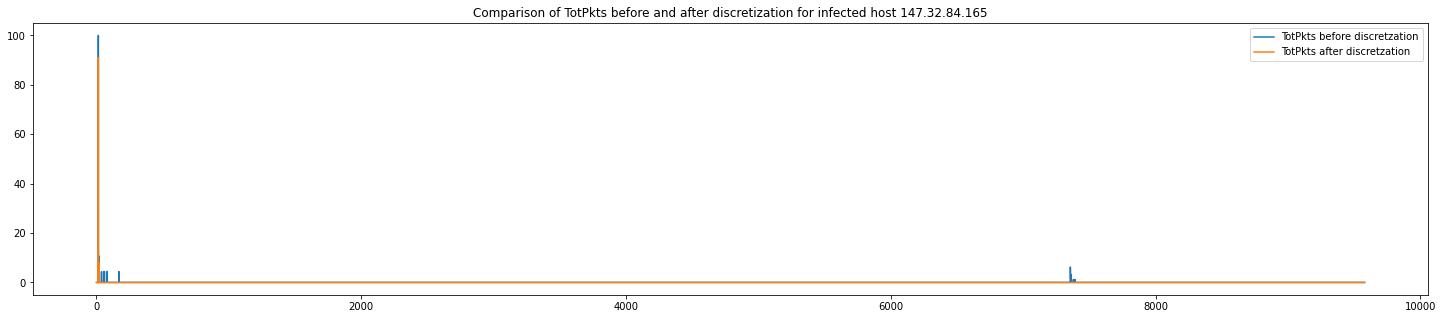

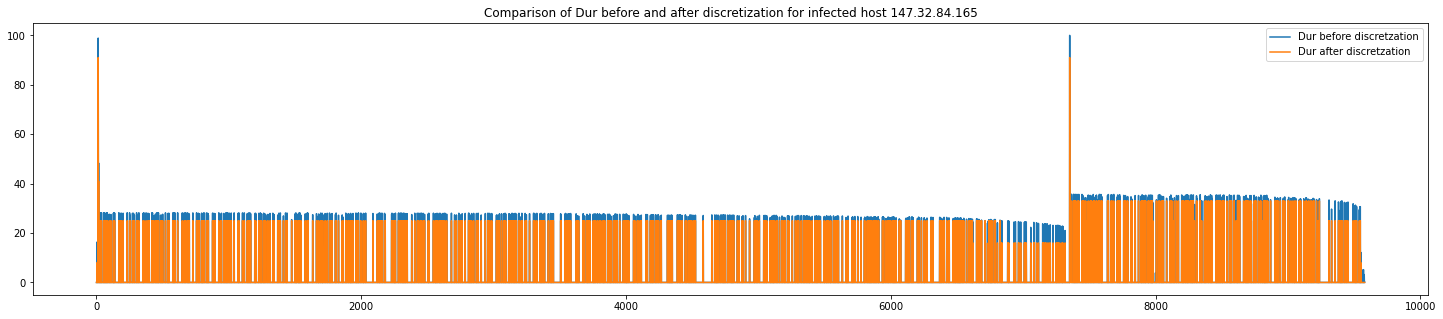

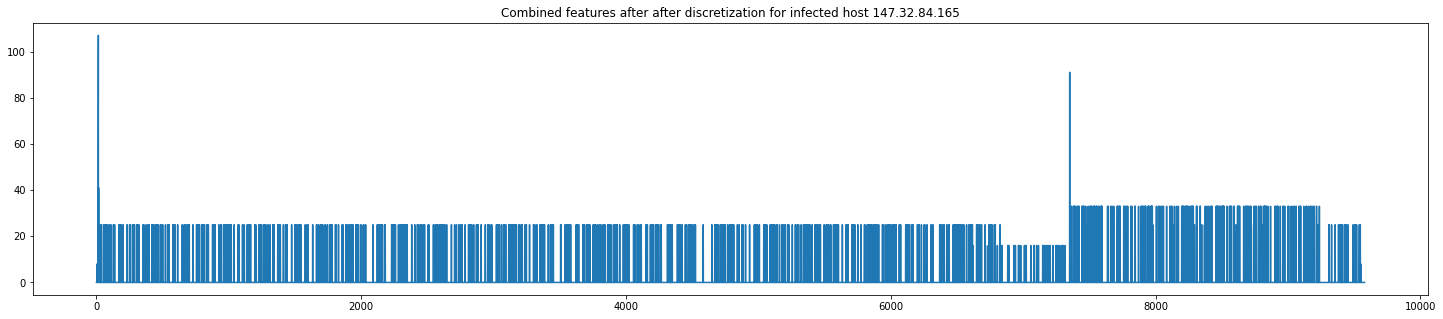

In [91]:
# Ignoring the FutureWarning which is internally thrown by NearestNeighbors
#warnings.simplefilter(action='ignore', category=UserWarning)

# choose a host to analyze
host = '147.32.84.165'
df_host = df[df['SrcAddr'] == host]
features_combined = np.zeros(len(df_host[[features[0]]]))

for i in range(len(features)):
    discretizer = KBinsDiscretizer(n_bins=12, strategy='uniform', encode='ordinal')
    df_feature = df_host[[features[i]]].to_numpy()
    df_feature = MinMaxScaler(feature_range=(0,100)).fit_transform(df_feature)
    discretizer.fit(df_feature)
    feature_discretized = discretize(discretizer, df_feature)
    features_combined += feature_discretized
    _, ax = plt.subplots(1, 1, figsize=(25, 5))
    #ax.set_ylim([None, 10000])
    ax.plot(df_feature)
    ax.plot(feature_discretized)
    ax.legend(labels=[f'{features[i]} before discretzation', f'{features[i]} after discretzation'], loc='upper right')
    ax.set_title(f'Comparison of {features[i]} before and after discretization for infected host {host}') 
    plt.show()

_, ax = plt.subplots(1, 1, figsize=(25, 5))
#ax.set_ylim([None, 20])
ax.plot(features_combined)
ax.set_title(f'Combined features after after discretization for infected host {host}') 
plt.show()

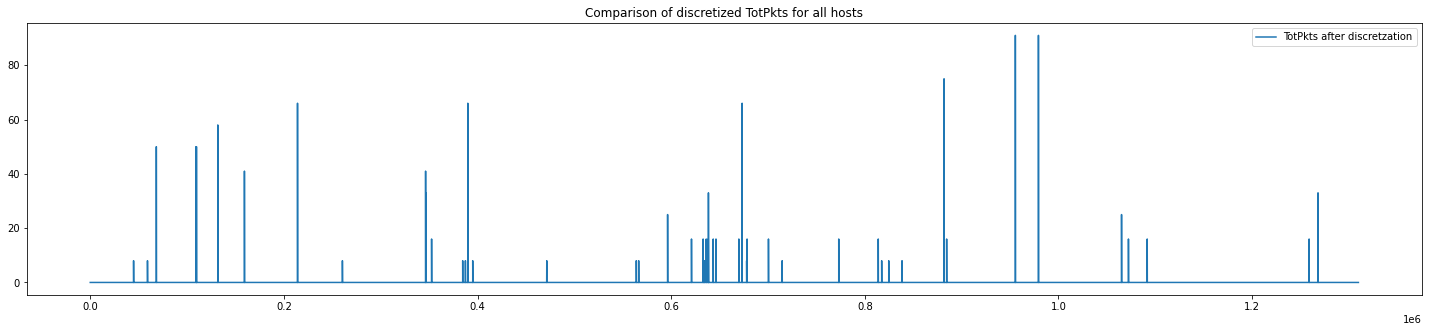

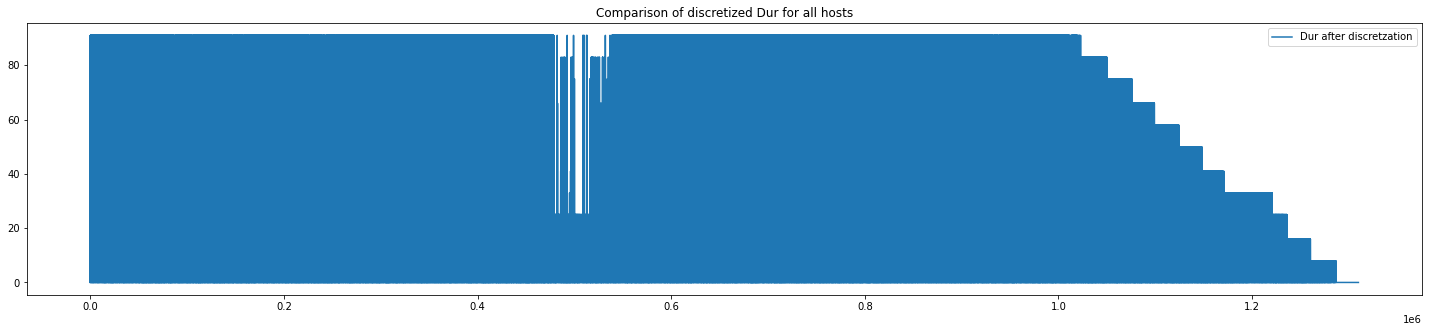

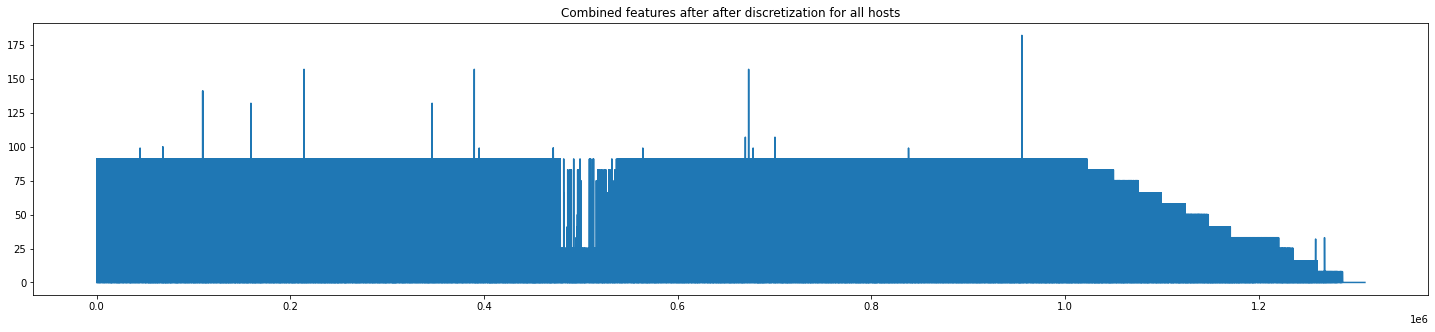

In [92]:
# applying to all hosts

features_combined = np.zeros(len(df[[features[0]]]))

for i in range(len(features)):
    discretizer = KBinsDiscretizer(n_bins=12, strategy='uniform', encode='ordinal')
    df_feature = df[[features[i]]].to_numpy()
    df_feature = MinMaxScaler(feature_range=(0,100)).fit_transform(df_feature)
    discretizer.fit(df_feature)
    feature_discretized = discretize(discretizer, df_feature)
    features_combined += feature_discretized
    _, ax = plt.subplots(1, 1, figsize=(25, 5))
    ax.plot(feature_discretized)
    ax.legend(labels=[f'{features[i]} after discretzation'], loc='upper right')
    ax.set_title(f'Comparison of discretized {features[i]} for all hosts')
    plt.show()

_, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.plot(features_combined)
ax.set_title(f'Combined features after after discretization for all hosts') 
plt.show()

### 1c. Answers and explanation

Firstly, when analyzing the correlation plots for benign and infected traffic, we notice that for the infected hosts, the correlation between the number of packets and the number of bytes sent is higher. This might mean that each packet sent by an infected host had a similar size, so sending more packets also resulted in more bytes.


## 2. Sketching task – 1/2 A4 (Individual, 10 Points)

### 2a. COUNT-MIN sketch


### 2b. Analysis and answers to the questions

## 3. Min-wise locality sensitive hashing task – 1/2 A4 (Individual, 10 Points)

### 3a. Implementation

In [47]:
df = pd.read_csv("data/dataset_10/capture20110818.binetflow")
features = ['TotPkts', 'Dur']
comb_col_name = 'TotPkts_Dur'
features_combined = np.zeros(len(df[[features[0]]]))

for i in range(len(features)):
    discretizer = KBinsDiscretizer(n_bins=12, strategy='uniform', encode='ordinal')
    df_feature = df[[features[i]]].to_numpy()
    bins = discretizer.fit_transform(df_feature)[:, 0]
    vectorizer = np.vectorize(lambda x: int(discretizer.bin_edges_[0][int(x)]))
    feature_discretized = vectorizer(bins)
    if i == 0:
        features_combined = list(map(str, feature_discretized))
    else:
        temp = list(map(str, feature_discretized))
        for i in range(len(features_combined)):
            features_combined[i] += temp[i]

features_combined = np.asarray(list(map(int, features_combined)))
df[comb_col_name] = features_combined
df.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,TotPkts_Dur
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt,10
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt,10
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established,10
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,10
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,10


In [39]:
# creating 3gram table
ip_pairs = set()

for index, row in df.iterrows():
    ip_pairs.add((row['SrcAddr'], row['DstAddr']))
print(len(ip_pairs))

258027


### 3b. Analysis and answers to the questions

## 4.Botnet profiling and fingerprinting task – 1 A4 (5 Points)

### 4a. Learn a sequential model, profiling and fingerprinting

### 4b. Analysis and answers to the questions.

## 5. Bonus Task 1/2 A4 (5 Points)

### 5a. Provide implementation and analysis.